In [23]:
import pandas as pd
import numpy as np
#from tensorflow.keras.preprocessing.sequence import pad_sequences
#import string
#import nltk
#from tensorflow.keras.utils import to_categorical
#from tensorflow import keras
#from sklearn.model_selection import train_test_split
#from nltk.stem.wordnet import WordNetLemmatizer
#import re
#from tensorflow.keras import regularizers
#from tensorflow.keras.layers import Embedding,Flatten,Dense,Conv1D,MaxPooling1D
#from nltk.corpus import stopwords
#import matplotlib.pyplot as plt
#import seaborn as sns
#from nltk.tokenize import word_tokenize
#from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator
#import plotly.express as px
#from collections import Counter
#from tensorflow.keras.preprocessing.text import Tokenizer
#from tensorflow.keras import Sequential
#from sklearn.preprocessing import OrdinalEncoder

In [24]:
df = pd.read_csv(r"C:\REAL TIME PROJECTS\NEW PROJECTS TO LEARN\cyberbullying\cyberbullying_tweets.csv")
df

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity


In [25]:
# EXPLORATORY DATA ANALYSIS

In [26]:
df['cyberbullying_type'].unique()

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [28]:
print(df.duplicated().sum())
df = df.drop_duplicates()
print(df.duplicated().sum())

36
0


<Axes: >

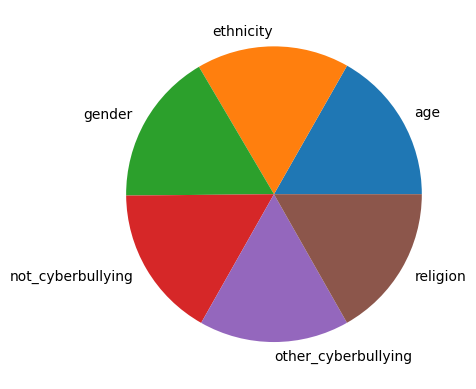

In [29]:
df.groupby('cyberbullying_type').size().plot(kind='pie')

In [30]:
# PREPROCESSING THE TWEETS

In [31]:
pip install tweet-preprocessor

Note: you may need to restart the kernel to use updated packages.


In [32]:
import preprocessor as p
#forming a separate feature for cleaned tweets
def preprocess_tweet(row):
    text = row['tweet_text']
    text = p.clean(text)
    return text

In [33]:
df['tweet_text'] = df.apply(preprocess_tweet, axis=1)

C:\Users\aaabh\AppData\Local\Temp\ipykernel_15688\4103963842.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tweet_text'] = df.apply(preprocess_tweet, axis=1)


In [34]:
df.head()

,tweet_text,cyberbullying_type
0,"In other words , your food was crapilicious!",not_cyberbullying
1,Why is so white?,not_cyberbullying
2,a classy whore? Or more red velvet cupcakes?,not_cyberbullying
3,"meh. thanks for the heads up, but not too conc...",not_cyberbullying
4,This is an ISIS account pretending to be a Kur...,not_cyberbullying


# Removing stop words

**What are stop words?**

Stop words are basically a set of commonly used words in any language, not just English.

The reason why stop words are critical to many applications is that, if we remove the words that are very commonly used in a given language, we can focus on the important words instead.

**Why do we need to remove stop words?**

Here are a few key benefits of removing stopwords:

* On removing stopwords, dataset size decreases and the time to train the model also decreases.
* Removing stopwords can potentially help improve the performance as there are fewer and only meaningful tokens left. Thus, it could increase classification accuracy.
* Even search engines like Google remove stopwords for fast and relevant retrieval of data from the database.
 



In [35]:
# REMOVING STOPWORDS

In [37]:
pip install gensim

     ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
     ---------------------------------------- 0.1/24.0 MB 1.5 MB/s eta 0:00:16
     ---------------------------------------- 0.1/24.0 MB 1.4 MB/s eta 0:00:17
     ---------------------------------------- 0.2/24.0 MB 1.5 MB/s eta 0:00:17
     ---------------------------------------- 0.3/24.0 MB 1.4 MB/s eta 0:00:17
      --------------------------------------- 0.3/24.0 MB 1.6 MB/s eta 0:00:15
      --------------------------------------- 0.4/24.0 MB 1.6 MB/s eta 0:00:15
      --------------------------------------- 0.4/24.0 MB 1.5 MB/s eta 0:00:16
      --------------------------------------- 0.5/24.0 MB 1.5 MB/s eta 0:00:16
      --------------------------------------- 0.6/24.0 MB 1.5 MB/s eta 0:00:16
     - -------------------------------------- 0.6/24.0 MB 1.5 MB/s eta 0:00:16
     - -------------------------------------- 0.7/24.0 MB 1.5 MB/s

In [38]:
from gensim.parsing.preprocessing import remove_stopwords

C:\Users\aaabh\anaconda3\envs\tensorflow_env\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [39]:
def stopword_removal(row):
    text = row['tweet_text']
    text = remove_stopwords(text)
    return text

In [40]:
df['tweet_text'] = df.apply(stopword_removal, axis=1)

C:\Users\aaabh\AppData\Local\Temp\ipykernel_15688\203576233.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tweet_text'] = df.apply(stopword_removal, axis=1)


In [41]:
df.head()

,tweet_text,cyberbullying_type
0,"In words , food crapilicious!",not_cyberbullying
1,Why white?,not_cyberbullying
2,classy whore? Or red velvet cupcakes?,not_cyberbullying
3,"meh. thanks heads up, concerned angry dude twi...",not_cyberbullying
4,This ISIS account pretending Kurdish account. ...,not_cyberbullying


In [42]:
df['tweet_text'] = df['tweet_text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')

C:\Users\aaabh\AppData\Local\Temp\ipykernel_15688\1777320700.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tweet_text'] = df['tweet_text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')


In [43]:
df.head()

,tweet_text,cyberbullying_type
0,"in words , food crapilicious!",not_cyberbullying
1,why white?,not_cyberbullying
2,classy whore? or red velvet cupcakes?,not_cyberbullying
3,"meh. thanks heads up, concerned angry dude twi...",not_cyberbullying
4,this isis account pretending kurdish account. ...,not_cyberbullying


In [ ]:
# TOKENIZATION

In [ ]:
def length(text):
    return len(word_tokenize(text))
df['word_count'] = df['tweet_text'].apply(length)

In [ ]:
fig = px.histogram(df, x="word_count", color="cyberbullying_type", title="Words in the tweet (including very long tweets)")
fig.show()
px.histogram(df[df.word_count<900], x="word_count", color="cyberbullying_type", title="Words in the tweet (excluding very long tweets)")

In [ ]:
print("Gender")
text = " ".join(review for review in df[df.cyberbullying_type=='gender'].tweet_text.astype(str))
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

print("Ethnicity")
text = " ".join(review for review in df[df.cyberbullying_type=='ethnicity'].tweet_text.astype(str))
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

print("Religion")
text = " ".join(review for review in df[df.cyberbullying_type=='religion'].tweet_text.astype(str))
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

print("Age")
text = " ".join(review for review in df[df.cyberbullying_type=='age'].tweet_text.astype(str))
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

print("Other")
text = " ".join(review for review in df[df.cyberbullying_type=='other_cyberbullying'].tweet_text.astype(str))
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

print("Non-bullying")
text = " ".join(review for review in df[df.cyberbullying_type=='not_cyberbullying'].tweet_text.astype(str))
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
# OTHER WAY OF PREPROCESSING

In [ ]:
def remove_punct(text):
  #print(text)
  return text.translate(str.maketrans('', '',string.punctuation))

df['no_punctuation'] = df['tweet_text'].apply(remove_punct)
df['no_punctuation']

In [ ]:
# CONVERTING UPPERCASE TO LOWERCASE AND REMOVING PUNCTUATIONS

In [ ]:
def lower(text):
    return text.lower()
df['no_punctuation'] = df['no_punctuation'].apply(lower)
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    new_text = []
    for el in word_tokenize(text):
        if not el in stop_words:
            new_text.append(el)
    return new_text
df['no_stopwords'] = df.no_punctuation.apply(remove_stopwords)

In [ ]:
# REMOVING EMOJIES

In [ ]:
def smile_handle(word_list):
  new_word_list = []
  emoji_pattern = re.compile(r"([\U00002600-\U000027BF])|([\U0001f300-\U0001f64F])|([\U0001f680-\U0001f6FF])", flags=re.UNICODE)
  for word in word_list:
    if len(re.findall(emoji_pattern,word))!=0:
      if len(re.findall(emoji_pattern,word))!=len(word):
        new_word_list.append(re.sub(emoji_pattern,'',word))
      new_word_list.extend(re.findall(emoji_pattern,word))
      #print(word,new_word_list)
    else:
      new_word_list.append(word)
  for i,el in enumerate(new_word_list):
    if type(el)==tuple:
      new_word_list[i] = el[1]
  return new_word_list
df.no_stopwords = df.no_stopwords.apply(smile_handle)

In [44]:
import nltk

In [ ]:
# LEMMATIZATION

In [ ]:
def lemmatize(words):
    new_words = []
    lem = WordNetLemmatizer()
    for w in words:
        new_words.append(lem.lemmatize(w))
    return new_words

df['lemmatized'] = df.no_stopwords.apply(lemmatize)

In [ ]:
vocab = Counter()

In [ ]:
def add_to_vocab(words):
  global vocab
  vocab.update(words)
df.lemmatized.apply(add_to_vocab)
vocab_size = len(vocab)
print("Vocabulary size: ",vocab_size)

In [ ]:
vocab.most_common(50)

In [ ]:
words = [key for key,val in vocab.items() if val>=3]
vocab_size = len(words)
print(vocab_size)
def remove_rare(text):
    global words
    for el in text:
        if not el in words:
            text.remove(el)
    return text
    
df.lemmatized = df.lemmatized.apply(remove_rare)

In [45]:
# SPLITTING THE DATA

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(df[['lemmatized']],df['cyberbullying_type'])

In [ ]:
vocab = Counter()
def add_to_vocab(words):
  global vocab
  vocab.update(words)
X_train.lemmatized.apply(add_to_vocab)
df.lemmatized.apply(add_to_vocab)
vocab_size = len(vocab)
vocab_size

In [ ]:
# TOKENIZATION

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train.lemmatized)
X_train = tokenizer.texts_to_sequences(X_train.lemmatized)
X_test = tokenizer.texts_to_sequences(X_test.lemmatized)

In [ ]:
max_size = len(max(df.lemmatized,key=lambda x:len(x)))
max_size

In [ ]:
X_train = pad_sequences(X_train, maxlen=max_size, padding='post')

In [ ]:
X_test = pad_sequences(X_test, maxlen=max_size, padding='post')

In [ ]:
enc = OrdinalEncoder()
y_train,y_test = to_categorical(enc.fit_transform(X=y_train.to_frame()),num_classes=6),to_categorical(enc.fit_transform(X=y_test.to_frame()),num_classes=6)

In [ ]:
X_train

In [ ]:
# TRAINING THE CNN MODEL

In [17]:
def define_model(vocab_size,max_length):
    model = Sequential()
    model.add(Embedding(vocab_size, 100, input_length=max_length))
    model.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(10, activation='relu',kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)))
    model.add(Dense(6, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
model = define_model(vocab_size,max_size)
model.fit(X_train, y_train, epochs=20, verbose=2)

In [ ]:
# EVALUATING THE MODEL

In [ ]:
results = model.evaluate(X_test, y_test)
results

In [ ]:
from tensorflow.keras.models import save_model
save_model(model, "model.h5")